# load_linnerud

In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = load_linnerud()

In [3]:
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
print(data.keys())

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [6]:
print(type(data.data))

<class 'numpy.ndarray'>


In [7]:
print(data.feature_names)

['Chins', 'Situps', 'Jumps']


In [8]:
print(data.data)

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]


In [5]:
print(data.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

:Number of Instances: 20
:Number of Attributes: 3
:Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. dropdown:: References

   * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
     Editions Technic.



In [9]:
print(data.target)

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


In [10]:
print(data.target_names)

['Weight', 'Waist', 'Pulse']


In [11]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target0'] = data.target[:, 0]
df['target1'] = data.target[:, 1]
df['target2'] = data.target[:, 2]

In [12]:
df.head()

,Chins,Situps,Jumps,target0,target1,target2
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [13]:
df.tail()

,Chins,Situps,Jumps,target0,target1,target2
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [14]:
df.describe()

,Chins,Situps,Jumps,target0,target1,target2
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Chins    20 non-null     float64
 1   Situps   20 non-null     float64
 2   Jumps    20 non-null     float64
 3   target0  20 non-null     float64
 4   target1  20 non-null     float64
 5   target2  20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [16]:
print(df.isnull().sum())

Chins      0
Situps     0
Jumps      0
target0    0
target1    0
target2    0
dtype: int64


<Axes: >

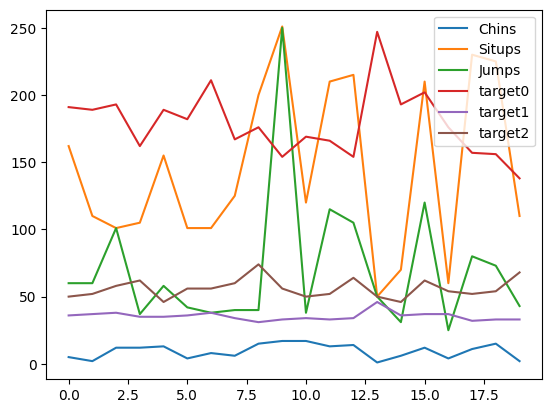

In [17]:
df.plot()

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [19]:
class LinnerudModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinnerudModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16), # input_size * 16 + 16
            nn.ReLU(),
            nn.Linear(16, output_size) # 16 * output_size + output_size
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [20]:
X = torch.Tensor(data.data)
y = torch.Tensor(data.target)

In [21]:
print(X)

tensor([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]])


In [22]:
print(y)

tensor([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        [247.,  46.,  50.],
        [193.,  36.,  46.],
        [202.,  37.,  62.],
        [176.,  37.,  54.],
        [157.,  32.,  52.],
        [156.,  33.,  54.],
        [138.,  33.,  68.]])


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train과 test를 8:2로 분할

In [24]:
model = LinnerudModel(3, 3)

In [25]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([-14.4665,  -6.8497,  33.5842]) tensor([189.,  37.,  52.])


In [26]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
print(model)

LinnerudModel(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [28]:
criterion = nn.MSELoss()

n_epochs = 100 # 100회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    for i in range(len(X_train)):
        y = torch.unsqueeze(model(X_train[i]), dim=0)
        target = torch.unsqueeze(y_train[i], dim=0)
        loss = criterion(y, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.data
    avg_loss /= len(X_train)
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, avg_loss))

epoch 0th loss: 13178.279296875
epoch 10th loss: 4953.580078125
epoch 20th loss: 2620.94384765625
epoch 30th loss: 2599.064453125
epoch 40th loss: 2592.285400390625
epoch 50th loss: 2586.4296875
epoch 60th loss: 2581.124267578125
epoch 70th loss: 2576.1611328125
epoch 80th loss: 2571.412353515625
epoch 90th loss: 2566.793701171875


In [29]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([103.1610,  20.4161,  35.4521]) tensor([189.,  37.,  52.])


In [30]:
model = LinnerudModel(3, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y = model(X_train)
    loss = criterion(y, y_train).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 8195.4677734375
epoch 1000th loss: 2377.3828125
epoch 2000th loss: 2186.622802734375
epoch 3000th loss: 1890.2525634765625
epoch 4000th loss: 1397.2772216796875
epoch 5000th loss: 922.4628295898438
epoch 6000th loss: 520.0936889648438
epoch 7000th loss: 293.30853271484375
epoch 8000th loss: 192.0649871826172
epoch 9000th loss: 160.87884521484375


In [31]:
n = 4
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([191.9689,  38.6480,  54.8607]) tensor([176.,  37.,  54.])


In [32]:
model = LinnerudModel(3, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

n_epochs = 50000 # 50000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y = model(X_train)
    loss = criterion(y, y_train).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5000 == 0:
        model.eval()
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 12078.2568359375 test loss: 13490.546875
epoch 5000th training loss: 2221.1630859375 test loss: 2700.420166015625
epoch 10000th training loss: 985.8971557617188 test loss: 1330.2239990234375
epoch 15000th training loss: 158.0479278564453 test loss: 277.5927429199219
epoch 20000th training loss: 95.33162689208984 test loss: 370.8790588378906
epoch 25000th training loss: 95.08097076416016 test loss: 387.5579833984375
epoch 30000th training loss: 95.08086395263672 test loss: 387.4489440917969
epoch 35000th training loss: 95.0809326171875 test loss: 387.4455261230469
epoch 40000th training loss: 95.08100128173828 test loss: 387.3519592285156
epoch 45000th training loss: 95.0809326171875 test loss: 387.4360656738281


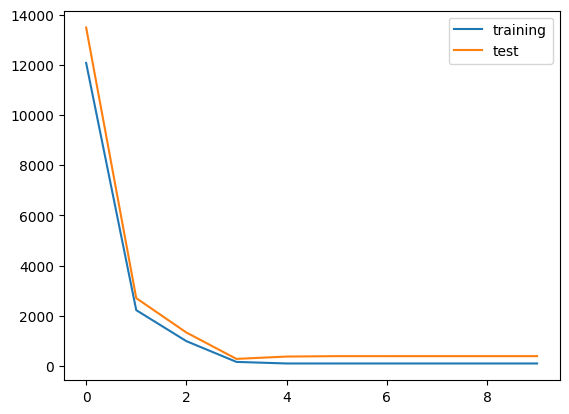

In [33]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred = model(X_test)
    score = r2_score(y_test, y_pred)
    print(score)

-2.7405588626861572


In [35]:
class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()

    def forward(self, y_pred, y_true):
        epsilon = 1e-8  
        loss = torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon)))
        return loss * 100  
    
mape_loss = MAPELoss()
y_pred = model(X_test).squeeze()
loss_value = mape_loss(y_pred, y_test)
print(f"MAPE Loss: {loss_value.item():.4f}%")

MAPE Loss: 10.5698%
